In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

In [2]:
import re
import json
import requests
import NewsAPI_Credentials as nc

In [3]:
keywords = ['Nextera Energy','Florida Power and Light']

In [4]:
def clean_news(news):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])\
                            |(\w+:\/\/\S+)"," ",news).split())

In [5]:
def news_sentiment(news):
    analysis = TextBlob(clean_news(news))
    polarity_score = analysis.sentiment.polarity
    if polarity_score > 0:
        return ['positive', polarity_score]
    elif polarity_score == 0:
        return ['neutral',polarity_score]
    else:
        return ['negative',polarity_score]

In [6]:
def get_news(keywords):
    news=[]
    for i in range(len(keywords)):
        url = 'https://newsapi.org/v2/everything/'
        params = {'q': keywords[i],'sortBy' : 'latest','apiKey' : nc.api_key}
        proxy = {'https' :'https://webproxyjb.fpl.com:8080'}
        response = requests.get(url,params = params, proxies = proxy).json()
        for article in response['articles']:
            try:
                parsed_news = {}
                parsed_news['source'] = article['source']['name']
                parsed_news['article'] = article['content']
                parsed_news['sentiment'] = news_sentiment(article['content'])[0]
                parsed_news['polarity_score'] = news_sentiment(article['content'])[1]
                parsed_news['news_date'] = article['publishedAt']
                #parsed_news['link'] = article['url']
                news.append(parsed_news)
            except:
                continue

    return news                

In [7]:
df = pd.DataFrame(get_news(keywords))

In [8]:
df.shape

(39, 5)

In [9]:
df.head()

,article,news_date,polarity_score,sentiment,source
0,Morgan Stanley thinks the longest bull market ...,2019-03-18T13:42:00Z,0.300000,positive,Business Insider
1,NextEra Energy Partners(NYSE:NEP) has a bold p...,2019-03-04T22:08:00Z,0.377778,positive,Fool.com
2,Among the challenges many retirees face is tha...,2019-03-17T13:05:00Z,0.122273,positive,Fool.com
3,Income-focused investors tend to fall into two...,2019-03-24T13:03:00Z,0.000000,neutral,Fool.com
4,The energy sector can be a great place for inc...,2019-03-18T15:02:00Z,0.300000,positive,Fool.com


In [10]:
df.to_excel('news_sentiment.xlsx')

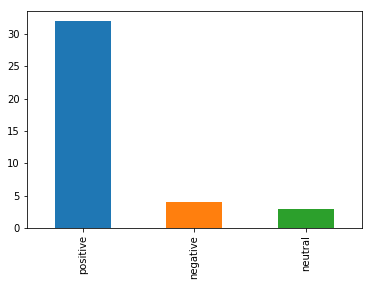

In [12]:
df['sentiment'].value_counts().plot(kind='bar')

In [15]:
ndf = df[df['sentiment']=='negative']

In [16]:
ndf

,article,news_date,polarity_score,sentiment,source
10,When Pattern Energy(NASDAQ:PEGI) ran into seve...,2019-03-24T18:06:00Z,-0.083333,negative,Fool.com
18,Earnings estimates for NextEra Energy Inc. NEE...,2019-03-19T15:06:03Z,-0.125000,negative,Yahoo.com
19,"No, you're not being paranoid. \r\nFour indivi...",2019-03-20T21:16:52Z,-0.050000,negative,Mashable
38,The third time will certainly not be the charm...,2019-03-02T11:00:00Z,-0.053571,negative,Theatlantic.com
